In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv


In [77]:
# Import necessary libraries for data manipulation, visualization, and machine learning models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
# Load the bank customer churn dataset from a CSV file into a DataFrame
df= pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
# Check for missing values in each column of the DataFrame and display the count
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
# Count the total number of duplicate rows in the DataFrame
df.duplicated().sum()

0

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


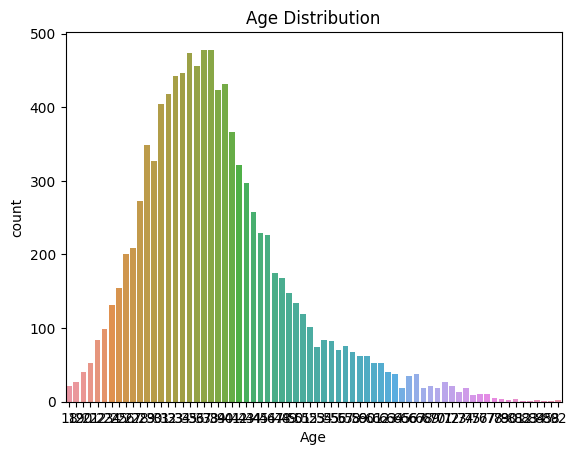

In [7]:
# Create a count plot to visualize the distribution of ages in the dataset
sns.countplot(x='Age', data=df)
plt.title("Age Distribution")
plt.show()

In [8]:
# Identify and store the names of categorical columns in the DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns

In [9]:
categorical_columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [10]:
# Drop the 'Surname' and 'Geography' columns from the DataFrame
df.drop(columns=['Surname', 'Geography'],axis=1,inplace=True)

In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
df['RowNumber'].unique()

array([    1,     2,     3, ...,  9998,  9999, 10000])

In [13]:
# Remove the 'RowNumber' column from the DataFrame as it is not needed for analysis
df.drop(columns=['RowNumber'],axis=1,inplace=True)

In [14]:
df['CustomerId'].unique()

array([15634602, 15647311, 15619304, ..., 15584532, 15682355, 15628319])

In [15]:
df.head(10)

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,Male,27,2,134603.88,1,1,1,71725.73,0


In [18]:
df.columns

Index(['CustomerId', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [16]:
encoding = LabelEncoder()

df['Gender'] = encoding.fit_transform(df['Gender'])





In [17]:
df.dtypes

CustomerId           int64
CreditScore          int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [18]:
# Calculate the correlation matrix for the numerical columns in the DataFrame
corr_matrix = df.corr()

In [19]:
corr_matrix

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,-0.002641,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Gender,-0.002641,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,0.009497,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


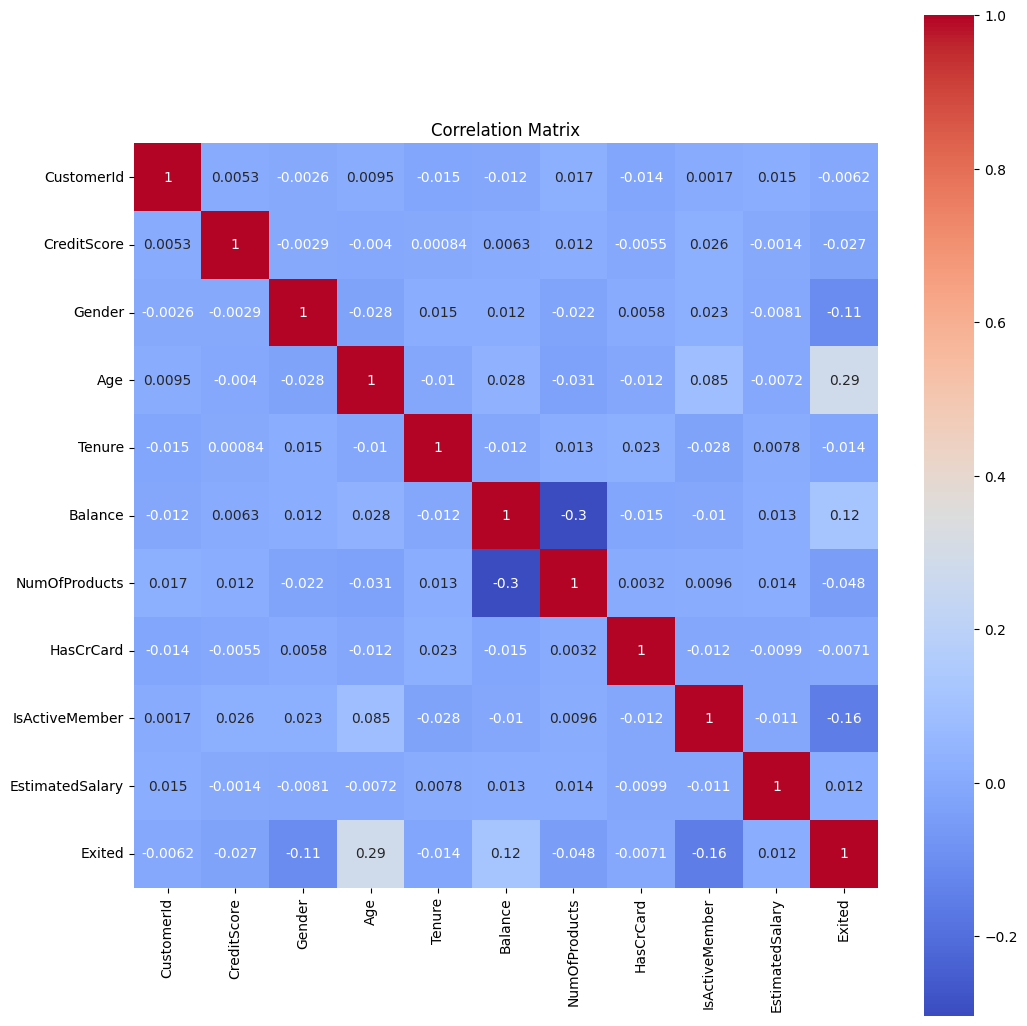

In [20]:
# Visualize the correlation matrix using a heatmap to show relationships between numerical features
plt.figure(figsize=(12,13))
sns.heatmap(corr_matrix,annot = True, cmap='coolwarm',square=True)
plt.title("Correlation Matrix")
plt.show()

In [24]:
df.columns

Index(['CustomerId', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [21]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [22]:
# Identify columns with a correlation greater than 0.5 with the 'Exited' target variable
important_columns = corr_matrix[corr_matrix['Exited']>0.5].index
important_columns 

Index(['Exited'], dtype='object')

In [55]:
# Separate features (X) and target variable (y) by dropping 'Exited' from the DataFrame
X = df.drop('Exited', axis =1)
y = df['Exited']

In [24]:
X.shape

(10000, 10)

In [25]:
y.shape

(10000,)

In [27]:
print(columns_need_to_scale)

['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


In [56]:

# Split the dataset into training and testing sets with 80% for training and 20% for testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
X_train.shape

(8000, 10)

In [ ]:
# Identify columns that need scaling by checking for values outside the range [0, 1]
columns_need_to_scale =[]
for columns in df.columns:
    if((df[columns]<0).any() or (df[columns]>1).any()):
        columns_need_to_scale.append(columns)
        

In [30]:
# Standardize the specified columns in the training and testing sets using StandardScaler

scaler = StandardScaler()

X_train[columns_need_to_scale] = scaler.fit_transform(X_train[columns_need_to_scale])
X_test[columns_need_to_scale] = scaler.fit_transform(X_test[columns_need_to_scale])


In [58]:
# Retrieve the values of the training feature set as a NumPy array
X_train.values

array([[1.5601116e+07, 6.8600000e+02, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.7909326e+05],
       [1.5766374e+07, 6.3200000e+02, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.9597886e+05],
       [1.5716994e+07, 5.5900000e+02, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 8.5891020e+04],
       ...,
       [1.5573851e+07, 7.3500000e+02, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 9.2220120e+04],
       [1.5807663e+07, 6.6700000e+02, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.7508040e+04],
       [1.5706268e+07, 6.9700000e+02, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 5.3581140e+04]])

In [60]:
# Initialize a Logistic Regression model with specified tolerance and regularization stren
lr = LogisticRegression(tol=1e-4, C=0.5)

In [61]:
# Train the Logistic Regression model using the training feature set (X_train) and target variable (y_train)
lr.fit(X_train,y_train)

LogisticRegression(C=0.5)

In [62]:
# Make predictions on the test set using the trained Logistic Regression model
pred = lr.predict(X_test)

In [63]:
# Calculate the accuracy of the predictions compared to the true labels and print it as a percentage
accuracy = accuracy_score(y_test,pred)
accuracy = accuracy*100
print(f"accuracy is ",accuracy,"%")

accuracy is  80.35 %


In [64]:
# Initialize a Random Forest classifier with 1000 decision trees.
RF = RandomForestClassifier(n_estimators=1000)


In [65]:
# Fit the Random Forest classifier to the training data (X_train) and labels (y_train)
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [66]:
# Make predictions on the test data (X_test) using the trained Random Forest classifier.
predict = RF.predict(X_test)

In [67]:
# Calculate the accuracy of the model by comparing predicted labels with true labels (y_test) and convert it to a percentage.
accuracy = accuracy_score(y_test,predict)
accuracy = accuracy*100
print(f"accuracy is ",accuracy,"%")

accuracy is  86.2 %


In [78]:
# Initialize a Gradient Boosting classifier with default hyperparameters.
GB = GradientBoostingClassifier()

In [79]:
# Fit the Gradient Boosting classifier to the training data (X_train) and labels (y_train).
GB.fit(X_train,y_train)

GradientBoostingClassifier()

In [80]:
# Make predictions on the test data (X_test) using the trained Gradient Boosting classifier.
predict = GB.predict(X_test)

In [81]:
# Calculate the accuracy of the model by comparing predicted labels with true labels (y_test) and convert it to a percentage.
accuracy = accuracy_score(y_test,predict)
accuracy = accuracy*100
print(f"accuracy is ",accuracy,"%")

accuracy is  86.3 %
